In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from scipy.stats          import pearsonr
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [2]:
import sys
from datetime import datetime
from pandas                 import DataFrame
from pandas                 import read_csv
from numpy                  import array
from numpy                  import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model   import LogisticRegression
from sklearn.tree           import DecisionTreeClassifier
from sklearn.ensemble       import RandomForestClassifier
from sklearn.ensemble       import GradientBoostingClassifier
from sklearn.svm            import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors      import KNeighborsClassifier
from sklearn.metrics        import accuracy_score
from sklearn.metrics        import auc
from sklearn.metrics        import roc_auc_score
from matplotlib             import pyplot
import datetime
import sys
from scipy.stats          import pearsonr
import pandas as pd
import numpy
import numpy as np
import sys
import matplotlib.pyplot as plt
from pandas               import DataFrame
from pandas               import Series
from pandas               import read_csv
from pandas               import get_dummies
from numpy                import array
from numpy                import random
from numpy                import where
from numpy                import nan
from scipy.stats.mstats   import winsorize
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics      import auc
from sklearn.metrics      import roc_auc_score
from matplotlib           import pyplot


from sklearn.model_selection import KFold, StratifiedKFold, cross_validate, GridSearchCV

# Reading Data

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Delete ID Column

In [6]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [7]:
train_Id = train['Id']
test_Id = test['Id']
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

In [8]:
print(train.shape)
print(test.shape)

(1460, 80)
(1459, 79)


## SalePrice Processing


 mu=180921.20 and sigma=79415.29 



D:\IESEG\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


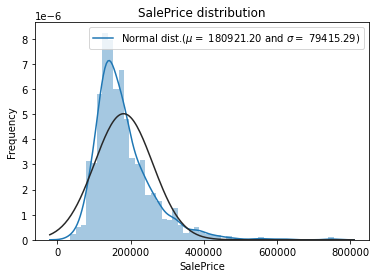

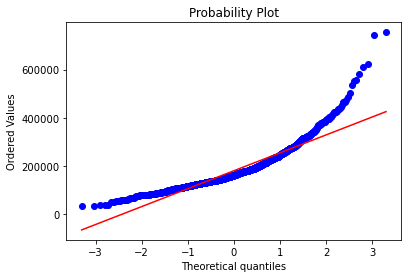

In [9]:
sns.distplot(train['SalePrice'], fit=norm)

(mu, sigma) = norm.fit(train['SalePrice'])
print('\n mu={:.2f} and sigma={:.2f} \n'.format(mu, sigma))

plt.legend(['Normal dist.($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [10]:
# The data skewness is large, which is converted by log1p function to make it more Gaussian distribution
train['SalePrice'] = np.log1p(train['SalePrice'])

D:\IESEG\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu=12.02 and sigma=0.40 



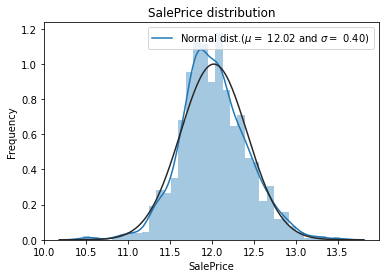

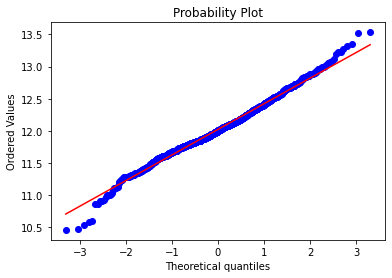

In [11]:
# after processing
sns.distplot(train['SalePrice'], fit=norm)

(mu, sigma) = norm.fit(train['SalePrice'])
print('\n mu={:.2f} and sigma={:.2f} \n'.format(mu, sigma))

plt.legend(['Normal dist.($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [12]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = train

## Missing Data

In [13]:
all_data.isnull().head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [14]:
all_data.isnull().sum().head(10)

MSSubClass        0
MSZoning          0
LotFrontage     259
LotArea           0
Street            0
Alley          1369
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
dtype: int64

In [15]:
all_data_na = (all_data.isnull().sum()/len(all_data))*100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' : all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945


Text(0.5, 1.0, 'Percent missing data by feature')

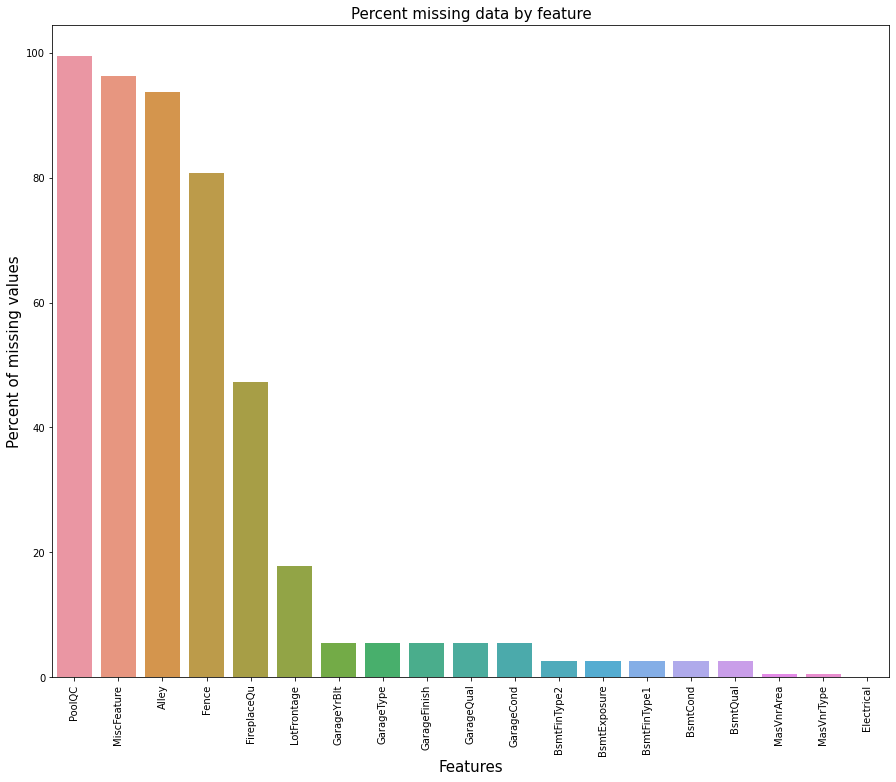

In [16]:
# Missing rate
f, axis = plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

## Fill the missing value

In [17]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


In [18]:
# According to the actual meaning of each feature, fill in the appropriate value
#1.the house itself does not have these facilities, we use none to fill directly.
feature1 = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 
            'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 
            'BsmtExposure','BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSSubClass']
for i in feature1:
    all_data[i] = all_data[i].fillna('')


feature2 = ['GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 
            'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea']
for i in feature2:
    all_data[i] = all_data[i].fillna(0)

#These are the essential functions of a house. 
feature3 = ['MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'SaleType']
for i in feature3:
    all_data[i] = all_data[i].fillna(all_data[i].mode()[0])
    
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
all_data = all_data.drop(['Utilities'], axis=1)
all_data['Functional'] = all_data['Functional'].fillna('Typ')

In [19]:
all_data["BsmtFinType1"]=all_data["BsmtFinType1"].replace(nan,1)
all_data["BsmtFinType1"]=all_data["BsmtFinType1"].replace("Unf",2)
all_data["BsmtFinType1"]=all_data["BsmtFinType1"].replace("LwQ",3)
all_data["BsmtFinType1"]=all_data["BsmtFinType1"].replace("Rec",4)
all_data["BsmtFinType1"]=all_data["BsmtFinType1"].replace("BLQ",5)
all_data["BsmtFinType1"]=all_data["BsmtFinType1"].replace("ALQ",6)
all_data["BsmtFinType1"]=all_data["BsmtFinType1"].replace("GLQ",7)

all_data["BsmtFinType2"]=all_data["BsmtFinType2"].replace(nan,1)
all_data["BsmtFinType2"]=all_data["BsmtFinType2"].replace("Unf",2)
all_data["BsmtFinType2"]=all_data["BsmtFinType2"].replace("LwQ",3)
all_data["BsmtFinType2"]=all_data["BsmtFinType2"].replace("Rec",4)
all_data["BsmtFinType2"]=all_data["BsmtFinType2"].replace("BLQ",5)
all_data["BsmtFinType2"]=all_data["BsmtFinType2"].replace("ALQ",6)
all_data["BsmtFinType2"]=all_data["BsmtFinType2"].replace("GLQ",7)

all_data["BsmtQual"]=all_data["BsmtQual"].replace(nan,1)
all_data["BsmtQual"]=all_data["BsmtQual"].replace("Po",2)
all_data["BsmtQual"]=all_data["BsmtQual"].replace("Fa",3)
all_data["BsmtQual"]=all_data["BsmtQual"].replace("TA",4)
all_data["BsmtQual"]=all_data["BsmtQual"].replace("Gd",5)
all_data["BsmtQual"]=all_data["BsmtQual"].replace("Ex",6)

all_data["BsmtCond"]=all_data["BsmtCond"].replace(nan,1)
all_data["BsmtCond"]=all_data["BsmtCond"].replace("Po",2)
all_data["BsmtCond"]=all_data["BsmtCond"].replace("Fa",3)
all_data["BsmtCond"]=all_data["BsmtCond"].replace("TA",4)
all_data["BsmtCond"]=all_data["BsmtCond"].replace("Gd",5)
all_data["BsmtCond"]=all_data["BsmtCond"].replace("Ex",6)

all_data["FireplaceQu"]=all_data["FireplaceQu"].replace(nan,1)
all_data["FireplaceQu"]=all_data["FireplaceQu"].replace("Po",2)
all_data["FireplaceQu"]=all_data["FireplaceQu"].replace("Fa",3)
all_data["FireplaceQu"]=all_data["FireplaceQu"].replace("TA",4)
all_data["FireplaceQu"]=all_data["FireplaceQu"].replace("Gd",5)
all_data["FireplaceQu"]=all_data["FireplaceQu"].replace("Ex",6)

all_data["GarageQual"]=all_data["GarageQual"].replace(nan,1)
all_data["GarageQual"]=all_data["GarageQual"].replace("Po",2)
all_data["GarageQual"]=all_data["GarageQual"].replace("Fa",3)
all_data["GarageQual"]=all_data["GarageQual"].replace("TA",4)
all_data["GarageQual"]=all_data["GarageQual"].replace("Gd",5)
all_data["GarageQual"]=all_data["GarageQual"].replace("Ex",6)

all_data["GarageCond"]=all_data["GarageCond"].replace(nan,1)
all_data["GarageCond"]=all_data["GarageCond"].replace("Po",2)
all_data["GarageCond"]=all_data["GarageCond"].replace("Fa",3)
all_data["GarageCond"]=all_data["GarageCond"].replace("TA",4)
all_data["GarageCond"]=all_data["GarageCond"].replace("Gd",5)
all_data["GarageCond"]=all_data["GarageCond"].replace("Ex",6)

all_data["ExterQual"]=all_data["ExterQual"].replace("Po",1)
all_data["ExterQual"]=all_data["ExterQual"].replace("Fa",2)
all_data["ExterQual"]=all_data["ExterQual"].replace("TA",3)
all_data["ExterQual"]=all_data["ExterQual"].replace("Gd",4)
all_data["ExterQual"]=all_data["ExterQual"].replace("Ex",5)

all_data["ExterCond"]=all_data["ExterCond"].replace("Po",1)
all_data["ExterCond"]=all_data["ExterCond"].replace("Fa",2)
all_data["ExterCond"]=all_data["ExterCond"].replace("TA",3)
all_data["ExterCond"]=all_data["ExterCond"].replace("Gd",4)
all_data["ExterCond"]=all_data["ExterCond"].replace("Ex",5)

all_data["BsmtExposure"]=all_data["BsmtExposure"].replace(nan,1)
all_data["BsmtExposure"]=all_data["BsmtExposure"].replace("No",2)
all_data["BsmtExposure"]=all_data["BsmtExposure"].replace("Mn",3)
all_data["BsmtExposure"]=all_data["BsmtExposure"].replace("Av",4)
all_data["BsmtExposure"]=all_data["BsmtExposure"].replace("Gd",5)

all_data["HeatingQC"]=all_data["HeatingQC"].replace("Po",1)
all_data["HeatingQC"]=all_data["HeatingQC"].replace("Fa",2)
all_data["HeatingQC"]=all_data["HeatingQC"].replace("TA",3)
all_data["HeatingQC"]=all_data["HeatingQC"].replace("Gd",4)
all_data["HeatingQC"]=all_data["HeatingQC"].replace("Ex",5)

all_data["KitchenQual"]=all_data["KitchenQual"].replace("Po",1)
all_data["KitchenQual"]=all_data["KitchenQual"].replace("Fa",2)
all_data["KitchenQual"]=all_data["KitchenQual"].replace("TA",3)
all_data["KitchenQual"]=all_data["KitchenQual"].replace("Gd",4)
all_data["KitchenQual"]=all_data["KitchenQual"].replace("Ex",5)

all_data["PoolQC"]=all_data["PoolQC"].replace(nan,1)
all_data["PoolQC"]=all_data["PoolQC"].replace("Fa",2)
all_data["PoolQC"]=all_data["PoolQC"].replace("TA",3)
all_data["PoolQC"]=all_data["PoolQC"].replace("Gd",4)
all_data["PoolQC"]=all_data["PoolQC"].replace("Ex",5)

all_data["Fence"]=all_data["Fence"].replace(nan,1)
all_data["Fence"]=all_data["Fence"].replace("MnWw",2)
all_data["Fence"]=all_data["Fence"].replace("GdWo",3)
all_data["Fence"]=all_data["Fence"].replace("MnPrv",4)
all_data["Fence"]=all_data["Fence"].replace("GdPrv",5)

all_data["GarageFinish"]=all_data["GarageFinish"].replace(nan,1)
all_data["GarageFinish"]=all_data["GarageFinish"].replace("Unf",2)
all_data["GarageFinish"]=all_data["GarageFinish"].replace("RFn",3)
all_data["GarageFinish"]=all_data["GarageFinish"].replace("Fin",4)

In [20]:
all_data['YearBuilt'] = 2021 - all_data['YearBuilt']
all_data['YearRemodAdd'] = 2021 - all_data['YearRemodAdd']
all_data['GarageYrBlt'] = 2021 - all_data['GarageYrBlt']

In [21]:
all_data_na = (all_data.isnull().sum()/len(all_data))*100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' : all_data_na})
missing_data.head()

,Missing Ratio


In [22]:
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,,Reg,Lvl,Inside,Gtl,...,0,,,,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,,Reg,Lvl,FR2,Gtl,...,0,,,,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,,IR1,Lvl,Inside,Gtl,...,0,,,,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,,IR1,Lvl,Corner,Gtl,...,0,,,,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,,IR1,Lvl,FR2,Gtl,...,0,,,,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,,Reg,Lvl,Inside,Gtl,...,0,,,,0,8,2007,WD,Normal,12.072547
1456,20,RL,85.0,13175,Pave,,Reg,Lvl,Inside,Gtl,...,0,,4,,0,2,2010,WD,Normal,12.254868
1457,70,RL,66.0,9042,Pave,,Reg,Lvl,Inside,Gtl,...,0,,5,Shed,2500,5,2010,WD,Normal,12.493133
1458,20,RL,68.0,9717,Pave,,Reg,Lvl,Inside,Gtl,...,0,,,,0,4,2010,WD,Normal,11.864469


## Add features

In [23]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

## Dummy

In [24]:
all_data = pd.get_dummies(all_data)
all_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,18,18,196.0,4,3,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,45,45,0.0,3,3,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,20,19,162.0,4,3,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,106,51,0.0,3,3,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,21,21,350.0,4,3,...,0,0,0,1,0,0,0,0,1,0


# pearson correlation 

In [25]:
types = all_data.dtypes.to_dict()
target = 'SalePrice'
selectedFeatures = []

for column in all_data.columns:
    columnType = types[column]
    print(f"{column} : {columnType}")
    if columnType in ["int64","float64"]:
        if column not in ("Id","SalePrice"):
            (pearson,pvalue) = pearsonr(all_data[column],all_data[target])
            print(f"{column} - p-vlue = {pvalue} - selected : {1 if pvalue < 0.05 else 0}")
            if pvalue < 0.05:
                     selectedFeatures.append(column)

MSSubClass : int64
MSSubClass - p-vlue = 0.004692354057563487 - selected : 1
LotFrontage : float64
LotFrontage - p-vlue = 3.643160850488477e-44 - selected : 1
LotArea : int64
LotArea - p-vlue = 1.6438769785249644e-23 - selected : 1
OverallQual : int64
OverallQual - p-vlue = 0.0 - selected : 1
OverallCond : int64
OverallCond - p-vlue = 0.1591270006839557 - selected : 0
YearBuilt : int64
YearBuilt - p-vlue = 1.1036359100663173e-135 - selected : 1
YearRemodAdd : int64
YearRemodAdd - p-vlue = 3.2116803528203247e-124 - selected : 1
MasVnrArea : float64
MasVnrArea - p-vlue = 1.0775684674926906e-65 - selected : 1
ExterQual : int64
ExterQual - p-vlue = 8.30602737593996e-198 - selected : 1
ExterCond : int64
ExterCond - p-vlue = 0.05959317801735989 - selected : 0
BsmtFinSF1 : int64
BsmtFinSF1 - p-vlue = 3.845514461128481e-49 - selected : 1
BsmtFinSF2 : int64
BsmtFinSF2 - p-vlue = 0.8536335149683948 - selected : 0
BsmtUnfSF : int64
BsmtUnfSF - p-vlue = 9.3181701505329e-18 - selected : 1
TotalBsmt

In [26]:
len(selectedFeatures)

34

In [27]:
selectedFeatures

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MoSold',
 'TotalSF']

In [28]:
all_data.columns.values.tolist()

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'TotalSF',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'Alley_',
 'Alley_Grvl',
 'Alley_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_F

In [29]:
selectedFeatures1 = ['MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'Alley_',
 'Alley_Grvl',
 'Alley_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition1_Artery',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Artery',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_1.5Fin',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'RoofStyle_Flat',
 'RoofStyle_Gable',
 'RoofStyle_Gambrel',
 'RoofStyle_Hip',
 'RoofStyle_Mansard',
 'RoofStyle_Shed',
 'RoofMatl_ClyTile',
 'RoofMatl_CompShg',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Exterior1st_AsbShng',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_CBlock',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_ImStucc',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_Stone',
 'Exterior1st_Stucco',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'Exterior1st_WdShing',
 'Exterior2nd_AsbShng',
 'Exterior2nd_AsphShn',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_BrkFace',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_ImStucc',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Other',
 'Exterior2nd_Plywood',
 'Exterior2nd_Stone',
 'Exterior2nd_Stucco',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'Exterior2nd_Wd Shng',
 'MasVnrType_',
 'MasVnrType_BrkCmn',
 'MasVnrType_BrkFace',
 'MasVnrType_None',
 'MasVnrType_Stone',
 'Foundation_BrkTil',
 'Foundation_CBlock',
 'Foundation_PConc',
 'Foundation_Slab',
 'Foundation_Stone',
 'Foundation_Wood',
 'BsmtQual_3',
 'BsmtQual_4',
 'BsmtQual_5',
 'BsmtQual_6',
 'BsmtQual_',
 'BsmtCond_2',
 'BsmtCond_3',
 'BsmtCond_4',
 'BsmtCond_5',
 'BsmtCond_',
 'BsmtExposure_2',
 'BsmtExposure_3',
 'BsmtExposure_4',
 'BsmtExposure_5',
 'BsmtExposure_',
 'BsmtFinType1_2',
 'BsmtFinType1_3',
 'BsmtFinType1_4',
 'BsmtFinType1_5',
 'BsmtFinType1_6',
 'BsmtFinType1_7',
 'BsmtFinType1_',
 'BsmtFinType2_2',
 'BsmtFinType2_3',
 'BsmtFinType2_4',
 'BsmtFinType2_5',
 'BsmtFinType2_6',
 'BsmtFinType2_7',
 'BsmtFinType2_',
 'Heating_Floor',
 'Heating_GasA',
 'Heating_GasW',
 'Heating_Grav',
 'Heating_OthW',
 'Heating_Wall',
 'CentralAir_N',
 'CentralAir_Y',
 'Electrical_FuseA',
 'Electrical_FuseF',
 'Electrical_FuseP',
 'Electrical_Mix',
 'Electrical_SBrkr',
 'Functional_Maj1',
 'Functional_Maj2',
 'Functional_Min1',
 'Functional_Min2',
 'Functional_Mod',
 'Functional_Sev',
 'Functional_Typ',
 'FireplaceQu_2',
 'FireplaceQu_3',
 'FireplaceQu_4',
 'FireplaceQu_5',
 'FireplaceQu_6',
 'FireplaceQu_',
 'GarageType_',
 'GarageType_2Types',
 'GarageType_Attchd',
 'GarageType_Basment',
 'GarageType_BuiltIn',
 'GarageType_CarPort',
 'GarageType_Detchd',
 'GarageFinish_2',
 'GarageFinish_3',
 'GarageFinish_4',
 'GarageFinish_',
 'GarageQual_2',
 'GarageQual_3',
 'GarageQual_4',
 'GarageQual_5',
 'GarageQual_6',
 'GarageQual_',
 'GarageCond_2',
 'GarageCond_3',
 'GarageCond_4',
 'GarageCond_5',
 'GarageCond_6',
 'GarageCond_',
 'PavedDrive_N',
 'PavedDrive_P',
 'PavedDrive_Y',
 'PoolQC_2',
 'PoolQC_4',
 'PoolQC_5',
 'PoolQC_',
 'Fence_2',
 'Fence_3',
 'Fence_4',
 'Fence_5',
 'Fence_',
 'MiscFeature_',
 'MiscFeature_Gar2',
 'MiscFeature_Othr',
 'MiscFeature_Shed',
 'MiscFeature_TenC',
 'SaleType_COD',
 'SaleType_CWD',
 'SaleType_Con',
 'SaleType_ConLD',
 'SaleType_ConLI',
 'SaleType_ConLw',
 'SaleType_New',
 'SaleType_Oth',
 'SaleType_WD',
 'SaleCondition_Abnorml',
 'SaleCondition_AdjLand',
 'SaleCondition_Alloca',
 'SaleCondition_Family',
 'SaleCondition_Normal',
 'SaleCondition_Partial']

In [30]:
selectedFeatures = selectedFeatures + selectedFeatures1

In [31]:
all_data = all_data[selectedFeatures]

In [32]:
all_data

,MSSubClass,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtFinSF1,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,18,18,196.0,4,706,150,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,45,45,0.0,3,978,284,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,20,19,162.0,4,486,434,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,106,51,0.0,3,216,540,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,21,21,350.0,4,655,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,22,21,0.0,3,0,953,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,43,33,119.0,3,790,589,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,80,15,0.0,5,275,877,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,71,25,0.0,3,49,0,...,0,0,0,1,0,0,0,0,1,0


In [33]:
all_data['SalePrice'] = y_train

In [34]:
all_data

,MSSubClass,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtFinSF1,BsmtUnfSF,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,60,65.0,8450,7,18,18,196.0,4,706,150,...,0,0,1,0,0,0,0,1,0,12.247699
1,20,80.0,9600,6,45,45,0.0,3,978,284,...,0,0,1,0,0,0,0,1,0,12.109016
2,60,68.0,11250,7,20,19,162.0,4,486,434,...,0,0,1,0,0,0,0,1,0,12.317171
3,70,60.0,9550,7,106,51,0.0,3,216,540,...,0,0,1,1,0,0,0,0,0,11.849405
4,60,84.0,14260,8,21,21,350.0,4,655,490,...,0,0,1,0,0,0,0,1,0,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,22,21,0.0,3,0,953,...,0,0,1,0,0,0,0,1,0,12.072547
1456,20,85.0,13175,6,43,33,119.0,3,790,589,...,0,0,1,0,0,0,0,1,0,12.254868
1457,70,66.0,9042,7,80,15,0.0,5,275,877,...,0,0,1,0,0,0,0,1,0,12.493133
1458,20,68.0,9717,5,71,25,0.0,3,49,0,...,0,0,1,0,0,0,0,1,0,11.864469


In [35]:
all_data.to_csv("Basetable.csv",index=False)

In [35]:
def partition (dataFrame : DataFrame, splitStrategy: [float]) -> [DataFrame]:

    def assignPartition (toDataFrame: DataFrame, lowerBound: float, upperBound: float, index: int) -> int:
        if toDataFrame["random"] >= lowerBound * observations and toDataFrame["random"] < upperBound * observations:
            return index
        else:
            return int(toDataFrame["Split"])

    if type(splitStrategy) != list:
        raise KeyError("Split strategy must be an array of floating point values.")
    elif sum(splitStrategy) != 1:
        raise ValueError("Split strategy must sum to 1.")
    else:
        observations = dataFrame.shape[0]
        partitions   = len(splitStrategy)

        cumulativeSplit = 0

        data = dataFrame.copy()
        data["random"] = random.permutation(observations)
        data["Split"]  = 0

    for index, split in enumerate(splitStrategy):
        lowerSplit = cumulativeSplit
        upperSplit = cumulativeSplit + split + 1
        cumulativeSplit += split
        data["Split"] = data.apply(lambda x: assignPartition(x,lowerSplit,upperSplit,index+1), axis = 1)

    partitions = []

    for i in range(len(splitStrategy)):
        partitions.append(data.loc[data["Split"] == i+1].drop(["Split","random"], axis = 1).reset_index(drop = True))

    return partitions


In [36]:
partitions = partition(dataFrame = all_data, splitStrategy = [0.8,0.2])

In [37]:
for (index,dataFrame) in enumerate(partitions):
    print(f"Partition {index} shape : {dataFrame.shape} ({len(dataFrame)/len(all_data)})")

Partition 0 shape : (1168, 282) (0.8)
Partition 1 shape : (292, 282) (0.2)


In [38]:
trainingSet   = partitions[0]
testSet = partitions[1]

In [39]:
y_trainingSet = trainingSet.SalePrice.values
y_testSet = testSet.SalePrice.values

In [40]:
all_data.drop('SalePrice', axis=1, inplace=True)

## Cross validation

In [41]:
n_splits = 5
def nmse_cv(model):
    kf = KFold(n_splits, shuffle=True, random_state=42).get_n_splits(trainingSet.values)
    nmse = np.sqrt(-cross_val_score(model, trainingSet.values, y_trainingSet, scoring='neg_mean_squared_error', cv=kf))
    return(nmse)

## Base model

In [42]:
models = [Lasso(alpha=0.01,max_iter=10000),GradientBoostingRegressor(),
          ElasticNet(alpha=0.001,max_iter=10000),
          LGBMRegressor(),XGBRegressor()]

In [43]:
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

In [44]:
names = ['Lasso', 'ELasticNet',  'GradientBoosting',  'XGBRegressor', 'LGBMRegressor']
for name, model in zip(names, models):
    score = rmse_cv(model, trainingSet.values, y_trainingSet)
    print("{}: {:.4f}, {:.4f}".format(name,score.mean(),score.std()))

Lasso: 0.0691, 0.0317
ELasticNet: 0.0082, 0.0013
GradientBoosting: 0.0071, 0.0032
XGBRegressor: 0.0464, 0.0076
LGBMRegressor: 0.0155, 0.0013


In [45]:
names = ['Lasso', 'ELasticNet',  'GradientBoosting',  'XGBRegressor', 'LGBMRegressor']
for name, model in zip(names, models):
    score = rmse_cv(model, testSet.values, y_testSet)
    print("{}: {:.4f}, {:.4f}".format(name,score.mean(),score.std()))

Lasso: 0.0712, 0.0461
ELasticNet: 0.0319, 0.0203
GradientBoosting: 0.0077, 0.0050
XGBRegressor: 0.1046, 0.0357
LGBMRegressor: 0.0531, 0.0211


In [46]:
all_data['SalePrice'] = y_train

In [47]:
class grid():
    def __init__(self,model):
        self.model = model
    
    def grid_get(self,X,y,param_grid):
        grid_search = GridSearchCV(self.model,param_grid,cv=5, scoring="neg_mean_squared_error")
        grid_search.fit(X,y)
        print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))
        grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
        print(pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score']])

In [48]:
grid(Lasso()).grid_get(trainingSet.iloc[:,:-1],trainingSet.SalePrice.values,{'alpha': [0.0004,0.0005,0.0007,0.0006,0.0009,0.0008],'max_iter':[10000]})

D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1453588224812092, tolerance: 0.014959101262468685
  model = cd_fast.enet_coordinate_descent(
D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1920837146361158, tolerance: 0.014309950307984168
  model = cd_fast.enet_coordinate_descent(
D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9744689601780516, tolerance: 0.01502388991706854
  model = cd_fast.enet_coordinate_descent(
D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529

D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3533177641115595, tolerance: 0.014905087227166007
  model = cd_fast.enet_coordinate_descent(
D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8977149973842584, tolerance: 0.01494384789130596
  model = cd_fast.enet_coordinate_descent(


{'alpha': 0.0004, 'max_iter': 10000} 0.14440437205039636
                                 params  mean_test_score  std_test_score
0  {'alpha': 0.0004, 'max_iter': 10000}         0.144404        0.014419
1  {'alpha': 0.0005, 'max_iter': 10000}         0.144706        0.014575
2  {'alpha': 0.0007, 'max_iter': 10000}         0.145582        0.014775
3  {'alpha': 0.0006, 'max_iter': 10000}         0.145052        0.014653
4  {'alpha': 0.0009, 'max_iter': 10000}         0.147142        0.014946
5  {'alpha': 0.0008, 'max_iter': 10000}         0.146294        0.014889


D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3466250805549116, tolerance: 0.018536691563317984
  model = cd_fast.enet_coordinate_descent(


In [49]:
grid(ElasticNet()).grid_get(trainingSet.iloc[:,:-1],trainingSet.SalePrice.values,{'alpha':[0.0005,0.0008,0.004,0.005],'l1_ratio':[0.08,0.1,0.3,0.5,0.7],'max_iter':[10000]})

D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8532735648169876, tolerance: 0.014905087227166007
  model = cd_fast.enet_coordinate_descent(
D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.47515189333210195, tolerance: 0.01494384789130596
  model = cd_fast.enet_coordinate_descent(
D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.881247838829605, tolerance: 0.014905087227166007
  model = cd_fast.enet_coordinate_descent(
D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529

D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.012944210723827, tolerance: 0.014309950307984168
  model = cd_fast.enet_coordinate_descent(
D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8145228084674727, tolerance: 0.01502388991706854
  model = cd_fast.enet_coordinate_descent(
D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2349361096292597, tolerance: 0.014905087227166007
  model = cd_fast.enet_coordinate_descent(
D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529:

D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.532691483328767, tolerance: 0.014959101262468685
  model = cd_fast.enet_coordinate_descent(
D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6251164457417833, tolerance: 0.014309950307984168
  model = cd_fast.enet_coordinate_descent(
D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3170554421143539, tolerance: 0.01502388991706854
  model = cd_fast.enet_coordinate_descent(
D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529:

D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.052218505760802, tolerance: 0.01502388991706854
  model = cd_fast.enet_coordinate_descent(
D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.051991986106827426, tolerance: 0.014905087227166007
  model = cd_fast.enet_coordinate_descent(


{'alpha': 0.0005, 'l1_ratio': 0.7, 'max_iter': 10000} 0.14521723114855836
                                               params  mean_test_score  \
0   {'alpha': 0.0005, 'l1_ratio': 0.08, 'max_iter'...         0.151733   
1   {'alpha': 0.0005, 'l1_ratio': 0.1, 'max_iter':...         0.151176   
2   {'alpha': 0.0005, 'l1_ratio': 0.3, 'max_iter':...         0.147446   
3   {'alpha': 0.0005, 'l1_ratio': 0.5, 'max_iter':...         0.145869   
4   {'alpha': 0.0005, 'l1_ratio': 0.7, 'max_iter':...         0.145217   
5   {'alpha': 0.0008, 'l1_ratio': 0.08, 'max_iter'...         0.150478   
6   {'alpha': 0.0008, 'l1_ratio': 0.1, 'max_iter':...         0.149832   
7   {'alpha': 0.0008, 'l1_ratio': 0.3, 'max_iter':...         0.146960   
8   {'alpha': 0.0008, 'l1_ratio': 0.5, 'max_iter':...         0.146364   
9   {'alpha': 0.0008, 'l1_ratio': 0.7, 'max_iter':...         0.146165   
10  {'alpha': 0.004, 'l1_ratio': 0.08, 'max_iter':...         0.149145   
11  {'alpha': 0.004, 'l1_ratio': 0.1, 

D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2770202775238486, tolerance: 0.018536691563317984
  model = cd_fast.enet_coordinate_descent(


In [50]:
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [51]:
# According to the actual meaning of each feature, fill in the appropriate value
#1.the house itself does not have these facilities, we use none to fill directly.
feature1 = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 
            'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 
            'BsmtExposure','BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSSubClass']
for i in feature1:
    test[i] = test[i].fillna('')


feature2 = ['GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 
            'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea']
for i in feature2:
    test[i] = test[i].fillna(0)

#These are the essential functions of a house. 
feature3 = ['MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'SaleType']
for i in feature3:
    test[i] = test[i].fillna(test[i].mode()[0])
    
test['LotFrontage'] = test.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
test = test.drop(['Utilities'], axis=1)
test['Functional'] = test['Functional'].fillna('Typ')

In [52]:
test["BsmtFinType1"]=test["BsmtFinType1"].replace(nan,1)
test["BsmtFinType1"]=test["BsmtFinType1"].replace("Unf",2)
test["BsmtFinType1"]=test["BsmtFinType1"].replace("LwQ",3)
test["BsmtFinType1"]=test["BsmtFinType1"].replace("Rec",4)
test["BsmtFinType1"]=test["BsmtFinType1"].replace("BLQ",5)
test["BsmtFinType1"]=test["BsmtFinType1"].replace("ALQ",6)
test["BsmtFinType1"]=test["BsmtFinType1"].replace("GLQ",7)

test["BsmtFinType2"]=test["BsmtFinType2"].replace(nan,1)
test["BsmtFinType2"]=test["BsmtFinType2"].replace("Unf",2)
test["BsmtFinType2"]=test["BsmtFinType2"].replace("LwQ",3)
test["BsmtFinType2"]=test["BsmtFinType2"].replace("Rec",4)
test["BsmtFinType2"]=test["BsmtFinType2"].replace("BLQ",5)
test["BsmtFinType2"]=test["BsmtFinType2"].replace("ALQ",6)
test["BsmtFinType2"]=test["BsmtFinType2"].replace("GLQ",7)

test["BsmtQual"]=test["BsmtQual"].replace(nan,1)
test["BsmtQual"]=test["BsmtQual"].replace("Po",2)
test["BsmtQual"]=test["BsmtQual"].replace("Fa",3)
test["BsmtQual"]=test["BsmtQual"].replace("TA",4)
test["BsmtQual"]=test["BsmtQual"].replace("Gd",5)
test["BsmtQual"]=test["BsmtQual"].replace("Ex",6)

test["BsmtCond"]=test["BsmtCond"].replace(nan,1)
test["BsmtCond"]=test["BsmtCond"].replace("Po",2)
test["BsmtCond"]=test["BsmtCond"].replace("Fa",3)
test["BsmtCond"]=test["BsmtCond"].replace("TA",4)
test["BsmtCond"]=test["BsmtCond"].replace("Gd",5)
test["BsmtCond"]=test["BsmtCond"].replace("Ex",6)

test["FireplaceQu"]=test["FireplaceQu"].replace(nan,1)
test["FireplaceQu"]=test["FireplaceQu"].replace("Po",2)
test["FireplaceQu"]=test["FireplaceQu"].replace("Fa",3)
test["FireplaceQu"]=test["FireplaceQu"].replace("TA",4)
test["FireplaceQu"]=test["FireplaceQu"].replace("Gd",5)
test["FireplaceQu"]=test["FireplaceQu"].replace("Ex",6)

test["GarageQual"]=test["GarageQual"].replace(nan,1)
test["GarageQual"]=test["GarageQual"].replace("Po",2)
test["GarageQual"]=test["GarageQual"].replace("Fa",3)
test["GarageQual"]=test["GarageQual"].replace("TA",4)
test["GarageQual"]=test["GarageQual"].replace("Gd",5)
test["GarageQual"]=test["GarageQual"].replace("Ex",6)

test["GarageCond"]=test["GarageCond"].replace(nan,1)
test["GarageCond"]=test["GarageCond"].replace("Po",2)
test["GarageCond"]=test["GarageCond"].replace("Fa",3)
test["GarageCond"]=test["GarageCond"].replace("TA",4)
test["GarageCond"]=test["GarageCond"].replace("Gd",5)
test["GarageCond"]=test["GarageCond"].replace("Ex",6)

test["ExterQual"]=test["ExterQual"].replace("Po",1)
test["ExterQual"]=test["ExterQual"].replace("Fa",2)
test["ExterQual"]=test["ExterQual"].replace("TA",3)
test["ExterQual"]=test["ExterQual"].replace("Gd",4)
test["ExterQual"]=test["ExterQual"].replace("Ex",5)

test["ExterCond"]=test["ExterCond"].replace("Po",1)
test["ExterCond"]=test["ExterCond"].replace("Fa",2)
test["ExterCond"]=test["ExterCond"].replace("TA",3)
test["ExterCond"]=test["ExterCond"].replace("Gd",4)
test["ExterCond"]=test["ExterCond"].replace("Ex",5)

test["BsmtExposure"]=test["BsmtExposure"].replace(nan,1)
test["BsmtExposure"]=test["BsmtExposure"].replace("No",2)
test["BsmtExposure"]=test["BsmtExposure"].replace("Mn",3)
test["BsmtExposure"]=test["BsmtExposure"].replace("Av",4)
test["BsmtExposure"]=test["BsmtExposure"].replace("Gd",5)

test["HeatingQC"]=test["HeatingQC"].replace("Po",1)
test["HeatingQC"]=test["HeatingQC"].replace("Fa",2)
test["HeatingQC"]=test["HeatingQC"].replace("TA",3)
test["HeatingQC"]=test["HeatingQC"].replace("Gd",4)
test["HeatingQC"]=test["HeatingQC"].replace("Ex",5)

test["KitchenQual"]=test["KitchenQual"].replace("Po",1)
test["KitchenQual"]=test["KitchenQual"].replace("Fa",2)
test["KitchenQual"]=test["KitchenQual"].replace("TA",3)
test["KitchenQual"]=test["KitchenQual"].replace("Gd",4)
test["KitchenQual"]=test["KitchenQual"].replace("Ex",5)

test["PoolQC"]=test["PoolQC"].replace(nan,1)
test["PoolQC"]=test["PoolQC"].replace("Fa",2)
test["PoolQC"]=test["PoolQC"].replace("TA",3)
test["PoolQC"]=test["PoolQC"].replace("Gd",4)
test["PoolQC"]=test["PoolQC"].replace("Ex",5)

test["Fence"]=test["Fence"].replace(nan,1)
test["Fence"]=test["Fence"].replace("MnWw",2)
test["Fence"]=test["Fence"].replace("GdWo",3)
test["Fence"]=test["Fence"].replace("MnPrv",4)
test["Fence"]=test["Fence"].replace("GdPrv",5)

test["GarageFinish"]=test["GarageFinish"].replace(nan,1)
test["GarageFinish"]=test["GarageFinish"].replace("Unf",2)
test["GarageFinish"]=test["GarageFinish"].replace("RFn",3)
test["GarageFinish"]=test["GarageFinish"].replace("Fin",4)

In [53]:
test['YearBuilt'] = 2021 - test['YearBuilt']
test['YearRemodAdd'] = 2021 - test['YearRemodAdd']
test['GarageYrBlt'] = 2021 - test['GarageYrBlt']

In [54]:
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']

In [55]:
test = pd.get_dummies(test)
test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,5,6,60,60,0.0,3,3,...,0,0,0,1,0,0,0,0,1,0
1,20,81.0,14267,6,6,63,63,108.0,3,3,...,0,0,0,1,0,0,0,0,1,0
2,60,74.0,13830,5,5,24,23,0.0,3,3,...,0,0,0,1,0,0,0,0,1,0
3,60,78.0,9978,6,6,23,23,20.0,3,3,...,0,0,0,1,0,0,0,0,1,0
4,120,43.0,5005,8,5,29,29,0.0,4,3,...,0,0,0,1,0,0,0,0,1,0


In [56]:
test[['Electrical_Mix', 'Exterior2nd_Other', 'MiscFeature_TenC', 'Heating_OthW', 'Condition2_RRAe', 'GarageQual_6', 'Condition2_RRNn', 'Exterior1st_Stone', 'RoofMatl_Roll', 'RoofMatl_ClyTile', 'RoofMatl_Membran', 'Condition2_RRAn', 'PoolQC_2', 'Heating_Floor', 'HouseStyle_2.5Fin', 'RoofMatl_Metal', 'Exterior1st_ImStucc']] = 0

In [57]:
test = test[selectedFeatures]

In [58]:
test

,MSSubClass,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtFinSF1,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,5,60,60,0.0,3,468.0,270.0,...,0,0,0,1,0,0,0,0,1,0
1,20,81.0,14267,6,63,63,108.0,3,923.0,406.0,...,0,0,0,1,0,0,0,0,1,0
2,60,74.0,13830,5,24,23,0.0,3,791.0,137.0,...,0,0,0,1,0,0,0,0,1,0
3,60,78.0,9978,6,23,23,20.0,3,602.0,324.0,...,0,0,0,1,0,0,0,0,1,0
4,120,43.0,5005,8,29,29,0.0,4,263.0,1017.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,51,51,0.0,3,0.0,546.0,...,0,0,0,1,0,0,0,0,1,0
1455,160,21.0,1894,4,51,51,0.0,3,252.0,294.0,...,0,0,0,1,1,0,0,0,0,0
1456,20,160.0,20000,5,61,25,0.0,3,1224.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,85,62.0,10441,5,29,29,0.0,3,337.0,575.0,...,0,0,0,1,0,0,0,0,1,0


In [59]:
all_data.drop('SalePrice', axis=1, inplace=True)

In [60]:
lasso_par = Lasso(alpha=0.0006,max_iter=10000)

In [61]:
model = lasso_par.fit(all_data,y_train)

D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1180722919912665, tolerance: 0.02327976343365451
  model = cd_fast.enet_coordinate_descent(


In [62]:
price = np.expm1(model.predict(test))

In [63]:
test['SalePrice'] = price

In [64]:
test['Id'] = test_Id

In [65]:
test_prob_price = test[['Id','SalePrice']]

In [66]:
test_prob_price.to_csv("test_prob_price.csv",index=False)

In [67]:
#GradientBoostingRegressor

In [68]:
test.drop('Id', axis=1, inplace=True)
test.drop('SalePrice', axis=1, inplace=True)

In [69]:
model2 = GradientBoostingRegressor().fit(all_data,y_train)

In [70]:
price2 = np.expm1(model2.predict(test))

In [71]:
test['SalePrice'] = price2

In [72]:
test['Id'] = test_Id

In [73]:
test_prob_price2 = test[['Id','SalePrice']]

In [74]:
test_prob_price2.to_csv("test_prob_price2.csv",index=False)

In [75]:
#ElasticNet

In [76]:
test.drop('Id', axis=1, inplace=True)
test.drop('SalePrice', axis=1, inplace=True)

In [77]:
#'alpha': 0.0008, 'l1_ratio': 0.5, 'max_iter': 10000
model3= ElasticNet(alpha=0.0008, l1_ratio=0.5,max_iter=10000).fit(all_data,y_train)

D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8379376313628235, tolerance: 0.02327976343365451
  model = cd_fast.enet_coordinate_descent(


In [78]:
price3 = np.expm1(model3.predict(test))

In [79]:
test['SalePrice'] = price3

In [80]:
test['Id'] = test_Id

In [81]:
test_prob_price3 = test[['Id','SalePrice']]

In [82]:
test_prob_price3.to_csv("test_prob_price3.csv",index=False)